In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['HF_HOME'] = "../cache/"
import torch
from PIL import Image
from IPython.display import display
from sd35_reconstructor import SD35_Reconstructor

In [2]:
device = "cuda"
reconstructor = SD35_Reconstructor(device)
clip_text_preds = torch.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/vision/subj01_40sess_hypatia_ridge_sd35/subject1/sd35_clip_text_voxels.pt")
t5_preds = torch.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/vision/subj01_40sess_hypatia_ridge_sd35/subject1/sd35_t5_text_voxels.pt")
latent_preds = torch.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/vision/subj01_40sess_hypatia_ridge_sd35/subject1/sd35_latent_voxels.pt")

Stable Diffusion 3.5 Reconstructor: Loading model...


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading OpenAI CLIP L...
Loading OpenCLIP bigG...
Loading Google T5-v1-XXL...
Skipping key 'shared.weight' in safetensors file as 'shared' does not exist in python model


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loading VAE model...
Loading SD3 model...
Models loaded.


/tmp/ipykernel_294462/3244253310.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clip_text_preds = torch.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/ou

torch.Size([154, 4096]) torch.Size([1, 2048]) torch.float64 torch.float64
torch.Size([1, 16, 128, 128]) torch.float32


100%|██████████| 33/33 [00:18<00:00,  1.81it/s]


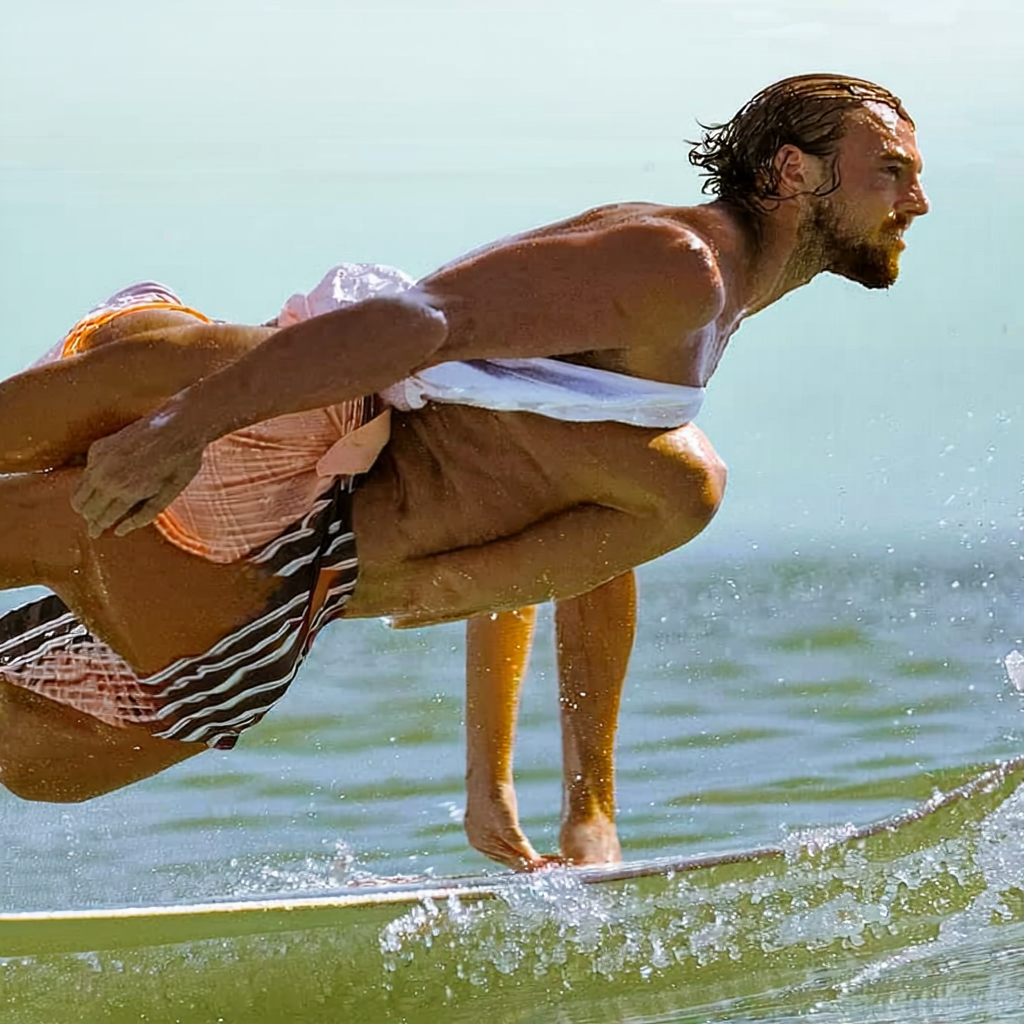

In [ ]:

index = 6
t5_pred = clip_text_preds[index]
clip_text_pred = t5_preds[index]
latent_pred = latent_preds[index]
prompt = "a woman riding a horse"
# image = Image.open(f"{sc_recon_path}/{index}/5.png")
clip_text_pred, t5_pred = reconstructor.embed_text(prompt)
# print(prompt_embed[0].dtype, prompt_embed[1].dtype)
# image_embed = recon.embed_image(image)
image = Image.open("/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter_MEI/assets/images/horse.jpg")
latent_pred = reconstructor.embed_latent(image)
print(clip_text_pred.shape, t5_pred.shape, clip_text_pred.dtype, t5_pred.dtype)
print(latent_pred.shape, latent_pred.dtype)
# print(torch.mean(image_embed), torch.mean(prompt_embed), torch.sum(image_embed), torch.sum(prompt_embed))
# print(prompt_embed.shape, image_embed.shape, latent_embed.shape)
# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
# init_image = load_image(url).resize((1024, 1024))

images = reconstructor.reconstruct(latent=latent_pred, c_t=clip_text_pred, t5=t5_pred, strength=0.8, num_steps=40, n_samples=1, cfg=4.5)
# show_images(sample)
display(images)